In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/combined.csv')

# Drop rows with any NaN values
df = df.dropna(axis = 1)

# Save the updated DataFrame to a new CSV file
df.to_csv('combined_output.csv', index=False)


In [ ]:
# Load the dataset
df = pd.read_csv('/content/combined_output.csv')

# Preprocess the data
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to evaluate
models = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    GaussianNB(),
    LinearDiscriminantAnalysis()
]

# Iterate over each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("model:", type(model).__name__)
    print("Accuracy:", accuracy)

    # Generate and print classification report
    report = classification_report(y_test, y_pred, zero_division=1)
    print("Classification Report:\n", report)

    # Calculate and print AUC score
    prob_predictions = model.predict_proba(X_test)
    auc_score = roc_auc_score(pd.get_dummies(y_test).values, prob_predictions, multi_class='ovr')
    print("AUC Score:", auc_score)

    print("-----------------------------------------")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset
df = pd.read_csv('/content/combined_output.csv')

X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the models as instances of the classifier classes with variable names
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
gb_model = GradientBoostingClassifier(n_estimators=15000, learning_rate=2.0, max_depth=20)
rf_model = RandomForestClassifier(n_estimators=15000, max_depth=100)
lda_model = LinearDiscriminantAnalysis()
nb_model = GaussianNB()

# Initialize an empty dictionary to store the average scores
average_scores = {'Model': [], 'Accuracy': [], 'AUC Score': [], 'Precision': [], 'Recall': [], 'F1-score': []}

# Iterate over the models
models = [
    ('SVM', svm_model),
    ('Gradient Boosting', gb_model),
    ('Random Forest', rf_model),
    ('LDA', lda_model),
    ('Naive Bayes', nb_model)
]

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    prob_predictions = model.predict_proba(X_test)

    # Calculate accuracy and AUC score
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(pd.get_dummies(y_test).values, prob_predictions, multi_class='ovr')

    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    # Calculate the average scores
    macro_average = report['macro avg']
    weighted_average = report['weighted avg']
    combined_average = {
        'precision': (macro_average['precision'] + weighted_average['precision']) / 2,
        'recall': (macro_average['recall'] + weighted_average['recall']) / 2,
        'f1-score': (macro_average['f1-score'] + weighted_average['f1-score']) / 2
    }

    # Add the model and average scores to the dictionary
    average_scores['Model'].append(model_name)
    average_scores['Accuracy'].append(accuracy)
    average_scores['AUC Score'].append(auc_score)
    average_scores['Precision'].append(combined_average['precision'])
    average_scores['Recall'].append(combined_average['recall'])
    average_scores['F1-score'].append(combined_average['f1-score'])



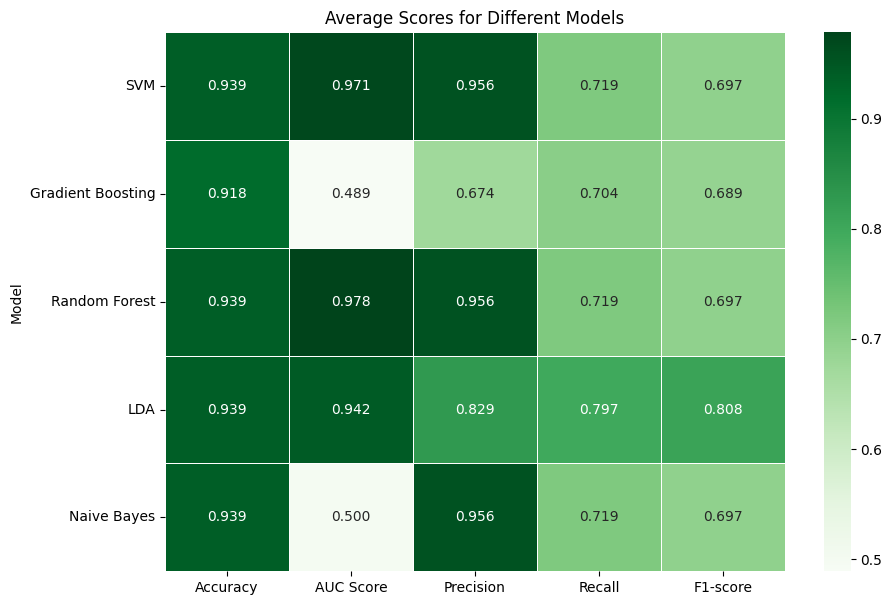

In [ ]:
# Convert average_scores dictionary to a pandas DataFrame
average_scores_df = pd.DataFrame(average_scores)

# Set the 'Model' column as the index for better visualization
average_scores_df.set_index('Model', inplace=True)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(average_scores_df, annot=True, cmap='Greens', fmt='.3f', linewidths=0.5)
plt.title('Average Scores for Different Models')
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/ones_only.csv')

# Separate the features from the target variable (if any)
X = data.drop('class', axis=1)  # Remove the target variable if it exists

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

# Take the absolute values of the principal components to ensure non-negativity
X_pca_abs = abs(X_pca)

# Encode the target variable if it is categorical
label_encoder = LabelEncoder()
y = data['class']  # Target variable column
y_encoded = label_encoder.fit_transform(y)

# Filter method 2: Chi-square test
def select_chi2_features(X_pca_abs, y, k=10):
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X_pca_abs, y)
    selected_features_indices = selector.get_support(indices=True)
    selected_features = X.columns[selected_features_indices]
    return selected_features

selected_chi2_features = select_chi2_features(X_pca_abs, y, k=10)
selected_chi2_features_df = X[selected_chi2_features[:10]]
#print(selected_chi2_features_df.head())

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_pca_abs, y)
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]




In [ ]:
gene_names = ['KRT33A','MAP3K14','ABCC8',
                        'CACNG3','TMEM132A',' AP2B1','TAC1',
                        'ZNF263','CX3CL1', 'SPATA20',
]
data2 =pd.DataFrame(data=X_new, columns=gene_names)

data2

,KRT33A,MAP3K14,ABCC8,CACNG3,TMEM132A,AP2B1,TAC1,ZNF263,CX3CL1,SPATA20
0,1.491150,0.300643,1.578754,0.437885,0.325675,0.899106,0.856678,1.834536,2.543145,0.759451
1,1.594131,1.169195,0.179521,2.674313,3.002262,3.855731,0.655988,2.118730,5.470180,2.311270
2,8.264325,1.593200,0.860526,3.622019,2.219060,0.603375,1.829786,3.258821,2.448399,2.946930
3,5.474343,1.037219,2.703020,0.581882,1.869555,2.358751,4.040979,2.060389,0.141799,1.789940
4,5.719762,0.372062,3.131746,3.020486,4.610139,1.335341,2.803805,0.065392,3.004385,4.682989
...,...,...,...,...,...,...,...,...,...,...
227,0.268894,1.791542,0.844732,0.853259,0.665164,1.642727,0.482792,0.701276,0.418645,1.042588
228,1.818606,0.598199,0.425357,0.153076,0.322010,1.169785,0.237745,0.022456,0.519220,0.648471
229,0.889889,0.504029,0.492581,0.876304,0.543612,0.521897,0.779118,0.161848,1.817861,1.209909
230,0.219902,0.669019,0.086888,0.040650,0.280180,0.944624,0.065181,0.107711,0.046129,0.156942


In [ ]:
# Calculate the correlation matrix
correlation_matrix = selected_chi2_features_df.corr()
correlation_matrix

,ENSG00000006059,ENSG00000006062,ENSG00000006071,ENSG00000006116,ENSG00000006118,ENSG00000006125,ENSG00000006128,ENSG00000006194,ENSG00000006210,ENSG00000006282
ENSG00000006059,1.000000,0.097073,0.761797,0.956106,0.141833,-0.809262,0.658398,-0.873582,-0.079622,-0.696502
ENSG00000006062,0.097073,1.000000,-0.016846,0.083891,0.119871,-0.212482,-0.016027,-0.104451,0.504898,-0.015670
ENSG00000006071,0.761797,-0.016846,1.000000,0.785902,0.271819,-0.727116,0.652456,-0.705176,-0.136707,-0.528984
ENSG00000006116,0.956106,0.083891,0.785902,1.000000,0.180970,-0.823170,0.699281,-0.904766,-0.077163,-0.695404
ENSG00000006118,0.141833,0.119871,0.271819,0.180970,1.000000,-0.216571,0.308774,-0.060249,-0.160631,-0.015311
ENSG00000006125,-0.809262,-0.212482,-0.727116,-0.823170,-0.216571,1.000000,-0.613760,0.749761,0.088644,0.649728
ENSG00000006128,0.658398,-0.016027,0.652456,0.699281,0.308774,-0.613760,1.000000,-0.611291,-0.098897,-0.496107
ENSG00000006194,-0.873582,-0.104451,-0.705176,-0.904766,-0.060249,0.749761,-0.611291,1.000000,-0.039943,0.650714
ENSG00000006210,-0.079622,0.504898,-0.136707,-0.077163,-0.160631,0.088644,-0.098897,-0.039943,1.000000,-0.005127
ENSG00000006282,-0.696502,-0.015670,-0.528984,-0.695404,-0.015311,0.649728,-0.496107,0.650714,-0.005127,1.000000


<Figure size 1000x800 with 0 Axes>

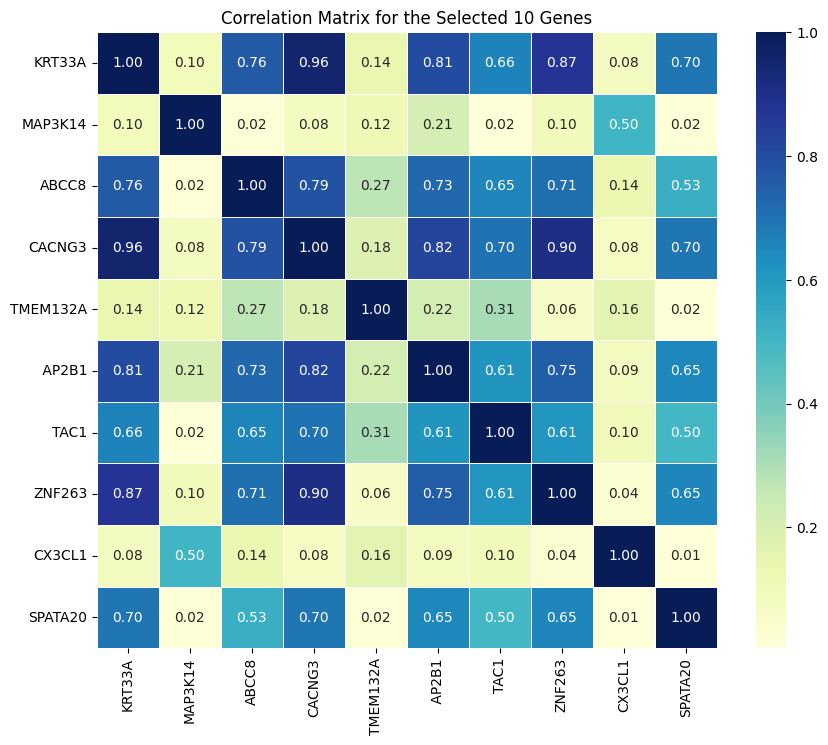

In [ ]:
selected_columns = data[['ENSG00000006059', 'ENSG00000006062', 'ENSG00000006071','ENSG00000006116', 'ENSG00000006118', 'ENSG00000006125','ENSG00000006128', 'ENSG00000006194', 'ENSG00000006210','ENSG00000006282']]
correlation_matrix = abs(selected_columns.corr())
plt.figure(figsize=(10, 8))

#print(selected_columns.head())

# Example customized feature names (replace with your desired names)
custom_feature_names = {
    'ENSG00000006059': 'KRT33A',
    'ENSG00000006062': 'MAP3K14',
    'ENSG00000006071': 'ABCC8',
    'ENSG00000006116': 'CACNG3',
    'ENSG00000006118': 'TMEM132A',
    'ENSG00000006125': ' AP2B1',
    'ENSG00000006128': 'TAC1',
    'ENSG00000006194': 'ZNF263',
    'ENSG00000006210': 'CX3CL1',
    'ENSG00000006282': 'SPATA20',
}

# Rename columns in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=custom_feature_names, columns=custom_feature_names)
# Set the figure size (adjust as per your preference)
plt.figure(figsize=(10, 8))

# Plot the heatmap with custom annotations and color map
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix for the Selected 10 Genes')

# Show the plot
plt.show()

       CACNG3    ZNF263    KRT33A
0    0.437885  1.834536  1.491150
1    2.674313  2.118730  1.594131
2    3.622019  3.258821  8.264325
3    0.581882  2.060389  5.474343
4    3.020486  0.065392  5.719762
..        ...       ...       ...
227  0.853259  0.701276  0.268894
228  0.153076  0.022456  1.818606
229  0.876304  0.161848  0.889889
230  0.040650  0.107711  0.219902
231  0.594289  0.648531  0.444317

[232 rows x 3 columns]


<Axes: title={'center': 'Linegraph Correlation of 3 Genes'}>

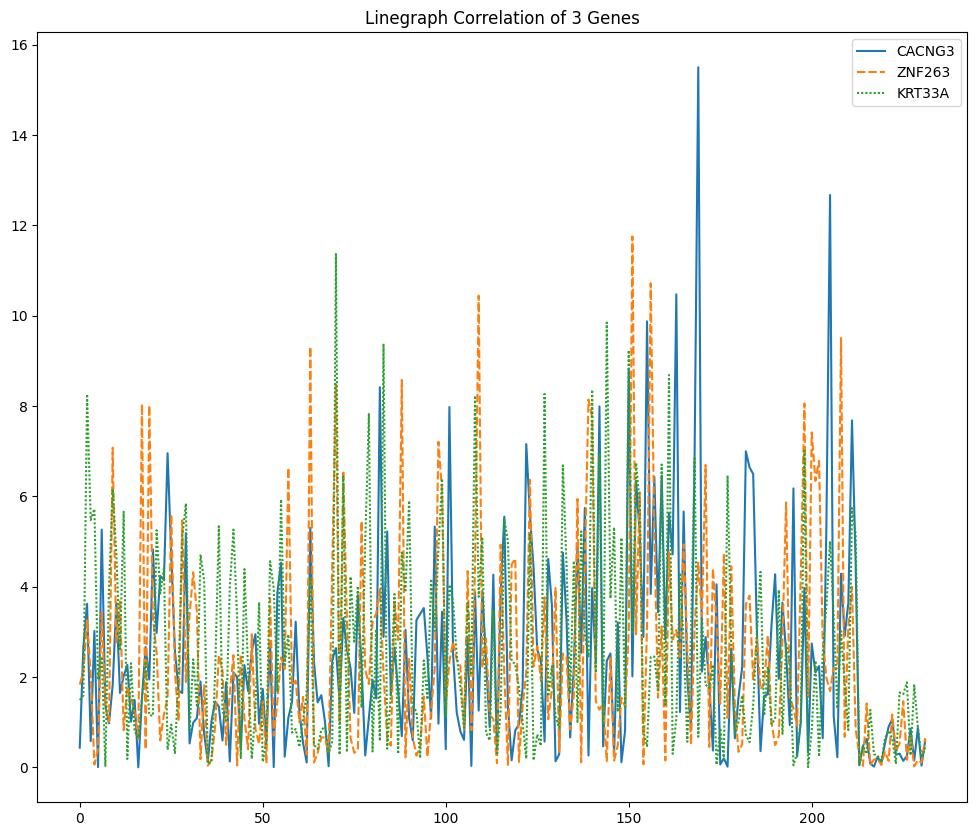

In [ ]:
import seaborn as sns

gene1 = [data2['CACNG3'],  data2['ZNF263'], data2['KRT33A']]
gene2 = data2['ZNF263']


gene_data = pd.DataFrame(gene1)
gene_data = np.transpose(gene_data)

print(gene_data)


plt.figure(figsize=(12, 10))
plt.title('Linegraph Correlation of 3 Genes')
sns.lineplot(gene_data)


<Axes: >

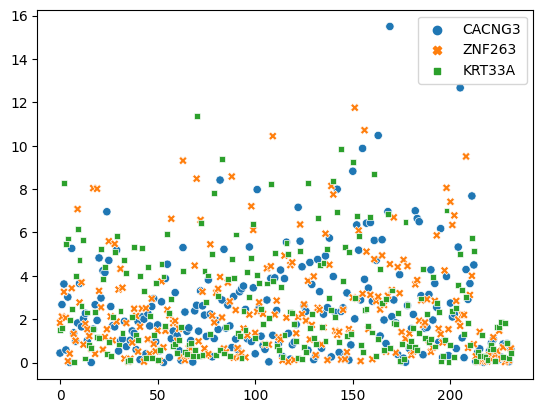

In [ ]:
sns.scatterplot(gene_data)